In [80]:
from operator import add
from PIL import Image
from IPython.display import display
im = Image.open("./images/sparkcontext.png")

#### SparkContext

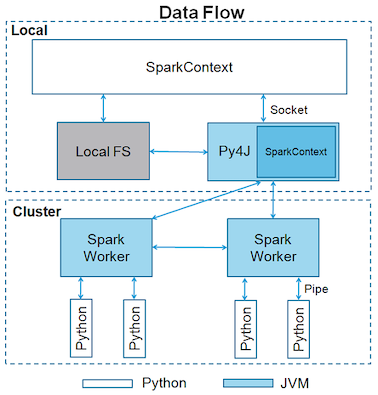

In [81]:
sc = SparkContext.getOrCreate() # SparkContext is the entry point to any spark functionality

display(im)

#### Operations on RDDs

In [82]:
# creating RDD
words = sc.parallelize (["scala", "java", "hadoop", "spark", "akka","spark vs hadoop", "pyspark", "pyspark and spark"])

# count
word_count = words.count()
print(".count(): Number of elements in RDD words -> {}".format(word_count))

# collect
word_coll = words.collect()
print(".collect(): Elements in RDD words -> {}".format(word_coll))

# filter
words = sc.parallelize (["scala", "java", "hadoop", "spark", "akka","spark vs hadoop", "pyspark", "pyspark and spark"])
words_filter = words.filter(lambda x: 'spark' in x)
filtered = words_filter.collect()
print(".filter(): Fitered RDD -> {}".format(filtered))

# map
words = sc.parallelize (["scala", "java", "hadoop", "spark", "akka","spark vs hadoop", "pyspark", "pyspark and spark"])
words_map = words.map(lambda x: (x, 1))
mapping = words_map.collect()
print(".collect(.map()): Key value pair -> {}".format(mapping))

# reduce
nums = sc.parallelize([1, 2, 3, 4, 5])
adding = nums.reduce(add)
print(".reduce(): Adding all the elements -> {}".format(adding))

# cache
words = sc.parallelize (["scala", "java", "hadoop", "spark", "akka","spark vs hadoop", "pyspark", "pyspark and spark"])
words.cache() 
caching = words.persist().is_cached 
print(".cache() Words got chached -> {}".format(caching))

# join
x = sc.parallelize([("spark", 1), ("hadoop", 4)])
y = sc.parallelize([("spark", 2), ("hadoop", 5)])
joined = x.join(y)
final = joined.collect()
print(".join(): Join x & y RDD -> {}".format(final))



.count(): Number of elements in RDD words -> 8
.collect(): Elements in RDD words -> ['scala', 'java', 'hadoop', 'spark', 'akka', 'spark vs hadoop', 'pyspark', 'pyspark and spark']
.filter(): Fitered RDD -> ['spark', 'spark vs hadoop', 'pyspark', 'pyspark and spark']
.collect(.map()): Key value pair -> [('scala', 1), ('java', 1), ('hadoop', 1), ('spark', 1), ('akka', 1), ('spark vs hadoop', 1), ('pyspark', 1), ('pyspark and spark', 1)]
.reduce(): Adding all the elements -> 15
.cache() Words got chached -> True
.join(): Join x & y RDD -> [('hadoop', (4, 5)), ('spark', (1, 2))]


#### Types of shared variables

In [83]:
# Broadcast variable: used to save the copy of data across all nodes
words_new = sc.broadcast(["scala", "java", "hadoop", "spark", "akka"]) 
data = words_new.value 
print("Stored data -> {}".format(data))
elem = words_new.value[2] 
print("Printing a particular element in RDD -> {}".format(elem))

Stored data -> ['scala', 'java', 'hadoop', 'spark', 'akka']
Printing a particular element in RDD -> hadoop


In [84]:
# Accumulator variable: used for aggregating the information through associative and commutative operations
num = sc.accumulator(10) 
def f(x): 
   global num 
   num+=x
rdd = sc.parallelize([20,30,40,50]) 
rdd.foreach(f) 
final = num.value 
print("Accumulated value is -> {}".format(final))

Accumulated value is -> 150


In [85]:
# https://www.tutorialspoint.com/pyspark/pyspark_sparkfiles.htm